In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sb

from steves_utils.ptn_do_report import (
    get_loss_curve,
)


from steves_utils.summary_utils import (
    get_experiments_from_path
)

from steves_utils.utils_v2 import (
    get_experiments_base_path
)

In [2]:
trials = get_experiments_from_path(
    os.path.join(get_experiments_base_path(), "hyperparameters_3/nQuery")
)

all_trials = pd.DataFrame(columns=[
    "source_val_label_accuracy",
    "source_val_label_loss",
    "target_val_label_accuracy",
    "target_val_label_loss",
    "total_epochs_trained",
    "total_experiment_time_secs",
    "n_query",
])

for trial in trials:
    f = pd.DataFrame(trial["results"])
    f["n_query"] = trial["parameters"]["n_query"]
    f = f[all_trials.columns]

    f = f.iloc[0] # Unknown why, but pandas is repeating trials for each domain in the trial!


    all_trials = all_trials.append(f)
    
all_trials = all_trials.reset_index(drop=True)
all_trials

,source_val_label_accuracy,source_val_label_loss,target_val_label_accuracy,target_val_label_loss,total_epochs_trained,total_experiment_time_secs,n_query
0,0.770660,0.610240,0.622708,1.204355,12.0,648.351718,2.0
1,0.752662,0.687113,0.606597,1.202507,8.0,420.562757,5.0
2,0.744792,0.668007,0.602273,1.240154,10.0,506.331586,10.0
3,0.502815,1.234007,0.416385,1.592985,10.0,563.393555,1.0


In [3]:
g = all_trials.groupby("n_query")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy",
]].mean()
g

,source_val_label_accuracy,target_val_label_accuracy
n_query,,
1.0,0.502815,0.416385
2.0,0.770660,0.622708
5.0,0.752662,0.606597
10.0,0.744792,0.602273


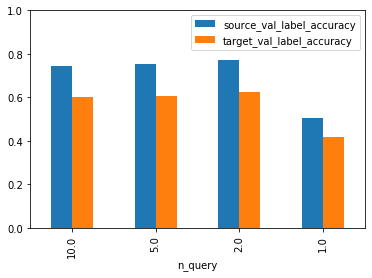

In [4]:
ax = all_trials.groupby("n_query")[[
    "source_val_label_accuracy",
    "target_val_label_accuracy"
]].mean().sort_values("n_query", ascending=False).plot(kind="bar")

ax.set_ylim(0,1)
ax